<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/UN_decade_banner.png' align='right' width='100%'/>

<a href="../../../../Index.ipynb"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FUNOD%2FCh05%2FQuantifying_PIC_POC%2FQuantifying_PIC_POC.ipynb"><img src="https://mybinder.org/badge_logo.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/UNOD/Ch05/Quantifying_PIC_POC/Quantifying_PIC_POC.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download data from the EUMETSAT Data Store

There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using SLSTR data; <br>
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-OLCI" target="_blank">Learn OLCI (EUMETSAT Gitlab)</a>**

For more contextual information, users should refer to the following case study where the image we generate here is published:
- **<a href="https://user.eumetsat.int/resources/case-studies/quantifying-particulate-organic-and-inorganic-carbon-in-the-ocean" target="_blank">Quantifying particulate organic and inorganic carbon in the ocean</a>** 

</div>
<hr>

# Quantifying particulate organic and inorganic carbon in the ocean
<font color="#138D75">**UN Ocean Decade Challenge 5: Unlock ocean-based solutions to climate change**</font>

### Data used

| Dataset | EUMETSAT Data Store<br>collection ID | EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO dataset<br>description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level-2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> |


### Learning outcomes

At the end of this notebook you will know how to;
* download OLCI level-2 data for the Norwegian and Barent's Seas for 31 May and 13 July, 2022
* plot appropriately flagged RGB and chlorophyll fields
* derive and plot particulate organic carbon (POC) from the normalised water leaving reflectance data
* optionally derive and plot particulate inorganic carbon (PIC) using external tools

### Outline

Carbon is cycled throughout the various parts of the Earth System in different forms. Carbon dioxide is emitted in to the atmosphere from both natural sources (e.g. decay of organic matter, volcanic eruptions etc) and from human sources (e.g. the burning of fossil fuels, land use change etc). The concentration of carbon dioxide in the atmosphere is effected by the oceans, through several mechanisms, including physical and biological processes, which control exchange between these two parts of the Earth system. 

The physical process of ocean carbon uptake is often referred to as the 'solubility pump', whereby carbon dioxide dissolves in to seawater becoming "Dissolved Organic Carbon" (DIC). Biological activity in the oceans also influences the movement of carbon from the atmosphere to the surface ocean, and within the ocean itself (i.e. from surface to deeper waters). Contributions to the "Particulate Inorganic Carbon" (PIC) pool occur via calcifying plankton species like coccolithophores, which use carbon ions to form their calcium carbonate skeletons. The occurence of algal blooms is closely linked to large biomass concentrations and, by extension, elevated "Particulate Organic Carbon" (POC).

Satellites can measure the factors that influence the physical system, and so the 'solubility pump' described above e.g. temperature, wind speeds etc, but can also measure the pools of different carbon species in ocean waters. In this notebebook we will investigate how we can calculate PIC and POC from OLCI level-2 products.

This code will replicate all of the figures from in the **<a href="https://user.eumetsat.int/resources/case-studies/quantifying-particulate-organic-and-inorganic-carbon-in-the-ocean" target="_blank">Quantifying particulate organic and inorganic carbon in the ocean</a>** case study, with the exception of the animation in figure 5. We recommend that users of this notebook refer to the case study for more background information on the calculation of PIC and POC.

### References

* Evers-King, H., Martinez-Vicente, V., Brewin, R. J., Dall'Olmo, G., Hickman, A. E., Jackson, T., ... & Sathyendranath, S. (2017). <a href="https://www.frontiersin.org/articles/10.3389/fmars.2017.00251/full" target="_blank">Validation and intercomparison of ocean color algorithms for estimating particulate organic carbon in the oceans</a>. Frontiers in Marine Science, 251.
* Stramski, D., Reynolds, R. A., Babin, M., Kaczmarek, S., Lewis, M. R., Röttgers, R., ... & Claustre, H. (2008). <a href="https://bg.copernicus.org/articles/5/171/2008/" target="_blank">Relationships between the surface concentration of particulate organic carbon and optical properties in the eastern South Pacific and eastern Atlantic Oceans</a>. Biogeosciences, 5(1), 171-201.
* Balch, W. M., Gordon, H. R., Bowler, B. C., Drapeau, D. T., & Booth, E. S. (2005). <a href="https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004JC002560" target="_blank">Calcium carbonate measurements in the surface global ocean based on Moderate‐Resolution Imaging Spectroradiometer data</a>. Journal of Geophysical Research: Oceans, 110(C7).
* Gordon, H. R., Boynton, G. C., Balch, W. M., Groom, S. B., Harbour, D. S., & Smyth, T. J. (2001). <a href="https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2000GL012025" target="_blank">Retrieval of coccolithophore calcite concentration from SeaWiFS imagery</a>. Geophysical Research Letters, 28(8), 1587-1590.

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>
    
 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2: Quantifying carbon pools](#section2)
 1. [Step 3: Acquiring OLCI data from the EUMETSAT Data Store](#section3)
 1. [Step 4: Reading reflectance and chlorophyll data](#section4)
 1. [Step 5: Preparing and plotting RGB images](#section5)
 1. [Step 6: Deriving and plotting POC](#section6)
 1. [Step 7 (Optional): Deriving and plotting PIC](#section7)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/blob/main/README.md?ref_type=heads" target="_blank">README</a>**.

In [1]:
import cartopy                          # a library that support mapping
import xarray as xr                     # a library that supports the use of multi-dimensional arrays in Python
import glob                             # a library that aids in searching for files
import json                             # a library that helps us make JSON format files
import numpy as np                      # a library that lets us work with arrays; we import this with a new name "np"
import os                               # a library that allows us access to basic operating system commands
import shutil                           # a library that allows us access to basic operating system commands like copy
import zipfile                          # a library that allows us to unzip zip-files.
import matplotlib.pyplot as plt         # a library that support plotting
import matplotlib.ticker as mticker     # a library that extends plotting support
from scipy.ndimage import median_filter # a library that supports image filtering
import eumdac                           # a tool that helps us download via the eumetsat/data-store
import eumartools                       # a EUMETSAT library that support working with Sentinel-3 products
import warnings                         # a library that helps us handle warnings
from pathlib import Path                # a library to help us to construct system paths
import getpass                          # a library to help us enter passwords

warnings.filterwarnings('ignore')

We will also create a directory to download our data to. We will be downloading ~1 Gb worth of Level-2 ocean colour data from Sentinel-3 OLCI sensor.

In [2]:
# Create a download directory for our OLCI products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

Below we will also define some parameters that will control how we read and plot our data.

In [3]:
# This switch will determine if we download data or not
download_data = True

# This will set the extents of our image plots
extents = {}
extents["image0"] = [-10.0, 37.5, 69.5, 78.5]
extents["image1"] = [17.00, 35.0, 70.5, 75.5]

# This will set the upper and lower limits of our RGB channels
truncations = {}
truncations["image0"] = [(-2.93, -2.55), (-2.86, -2.55), (-2.88, -2.25)]
truncations["image1"] = [(-3.00, -1.00), (-3.20, -1.00), (-3.40, -0.80)]

# This parameter will sub-sample our OLCI products, which will speed up reading and plotting our data.
# The default value is 1, for full resolution, but you may want to increase this as high as 5 if you have memory
# issues. It is currently set to 5 to reduce the size of the rendered notebook.
grid_reduce = 5

# This list tells us which reflectance bands we will read in
radiometry_bands = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# This sets our plot default font size
plt.rcParams.update({'font.size': 20})

# This sets our figure dpi: default is 100 to reduce the size of the rendered notebook
dpi = 100

<div class="alert alert-warning" role="alert">

## <a id='sectionSF'></a>Supporting functions
[Back to top](#TOCTOP)

</div>

Before we begin, we will define a few short functions. This quick function below will decorate our plots with gridlines and labels.

In [4]:
def embellish_plot(m):
    """Quick function to embellish plots with gridlines and labels

    Args:
        m (axis): the axis to plot into
    Returns:
        None
    """
    # Embellish with gridlines
    m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=500)
    g1 = m.gridlines(draw_labels = True, linestyle='--', linewidth=0.5, zorder=1000)
    g1.top_labels = g1.right_labels = False
    g1.xlabel_style = g1.ylabel_style = {'color': '0.5'}

This function calculates red, green and blue from OLCI reflectance or radiometry channels using the **<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4634488/" target="_blank">Tristimulus values</a>** provided by the ESA STEP SNAP package.

In [5]:
def tristim(channel_dict, level=2):
    """Quick function to calculate tristumulus RGB from OLCI reflectance or radiometry channels

    Args:
        channel_dict (dict)      : dictionary of stored radiance bands and values
        level                    : satellite level (1 or 2)
    Returns:
        red, green, blue (array) : the red, green and blue channels
    """
    if level == 1:
        red =    np.log(1.0 + 0.01 * channel_dict["Oa01_radiance"] + 0.09 * channel_dict["Oa02_radiance"] 
                            + 0.35 * channel_dict["Oa03_radiance"] + 0.04 * channel_dict["Oa04_radiance"] 
                            + 0.01 * channel_dict["Oa05_radiance"] + 0.59 * channel_dict["Oa06_radiance"] 
                            + 0.85 * channel_dict["Oa07_radiance"] + 0.12 * channel_dict["Oa08_radiance"] 
                            + 0.07 * channel_dict["Oa09_radiance"] + 0.04 * channel_dict["Oa10_radiance"])
        green =  np.log(1.0 + 0.26 * channel_dict["Oa03_radiance"] + 0.21 * channel_dict["Oa04_radiance"] 
                            + 0.50 * channel_dict["Oa05_radiance"] + 1.00 * channel_dict["Oa06_radiance"] 
                            + 0.38 * channel_dict["Oa07_radiance"] + 0.04 * channel_dict["Oa08_radiance"] 
                            + 0.03 * channel_dict["Oa09_radiance"] + 0.02 * channel_dict["Oa10_radiance"])
        blue =   np.log(1.0 + 0.07 * channel_dict["Oa01_radiance"] + 0.28 * channel_dict["Oa02_radiance"] 
                            + 1.77 * channel_dict["Oa03_radiance"] + 0.47 * channel_dict["Oa04_radiance"] 
                            + 0.16 * channel_dict["Oa05_radiance"])
    elif level == 2:
        red =   np.log(0.05 + 0.01 * channel_dict['Oa01_reflectance'] + 0.09 * channel_dict['Oa02_reflectance'] 
                            + 0.35 * channel_dict['Oa03_reflectance'] + 0.04 * channel_dict['Oa04_reflectance']
                            + 0.01 * channel_dict['Oa05_reflectance'] + 0.59 * channel_dict['Oa06_reflectance']
                            + 0.85 * channel_dict['Oa07_reflectance'] + 0.12 * channel_dict['Oa08_reflectance']
                            + 0.07 * channel_dict['Oa09_reflectance'] + 0.04 * channel_dict['Oa10_reflectance'])
        green = np.log(0.05 + 0.26 * channel_dict['Oa03_reflectance'] + 0.21 * channel_dict['Oa04_reflectance'] 
                            + 0.50 * channel_dict['Oa05_reflectance'] + 1.00 * channel_dict['Oa06_reflectance']
                            + 0.38 * channel_dict['Oa07_reflectance'] + 0.04 * channel_dict['Oa08_reflectance']
                            + 0.03 * channel_dict['Oa09_reflectance'] + 0.02 * channel_dict['Oa10_reflectance'])
        blue =  np.log(0.05 + 0.07 * channel_dict['Oa01_reflectance'] + 0.28 * channel_dict['Oa02_reflectance']
                            + 1.77 * channel_dict['Oa03_reflectance'] + 0.47 * channel_dict['Oa04_reflectance']
                            + 0.16 * channel_dict['Oa05_reflectance'])
    return red, green, blue   

<div class="alert alert-info" role="alert">

## <a id='section=2'></a>2. Quantifying carbon pools
[Back to top](#TOCTOP)

</div>

### Particulate organic carbon (POC)

POC can be calculated from remote sensing reflectance using various methods, as summarised by **<a href="https://www.frontiersin.org/articles/10.3389/fmars.2017.00251/full" target="_blank">Evers-King et al. (2017)</a>**. Here we will use the method proposed by **<a href="https://bg.copernicus.org/articles/5/171/2008/" target="_blank">Stramski et al. (2008)</a>**, which derives POC from an empirical relationship based on the the ratio of blue to green light. POC is calculateed as follows;

$POC = 203.2 * [ R_{rs}(443) / R_{rs}(555) ]^{-1.304} = 203.2 * [ p_{w}(443) / p_{w}(555) ]^{-1.304} &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (eq.1)

where $R_{rs}$ is the remote sensing reflectance. However, in the standard level-2 products, OLCI does not provide $R_{rs}$ but the water reflectance in the direction of the observer $p_{w}$. However, as $R_{rs} = \pi * p_{w}$, the $\pi$ cancels and we can use the right hand side of the equation. (*Note that we are not applying a **<a href="https://www.oceanopticsbook.info/view/surfaces/the-brdf" target="_blank">BRDF</a>** correction here*). This method can now be applied directly to OLCI, as **band 3** and **band 6** have widths of 10 nm and centres at 442.5 nm and 560 nm, respectively.

### Particulate inorganic carbon (PIC)

PIC can also be from remote sensing reflectance, but the implementations of these methods is a little less staightforward. **<a href="https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004JC002560" target="_blank">Balch et al. (2005)</a>** propose a 2-band (440 nm & 550 nm) algorithm, which can be directly applied to OLCI. However, this method requires a look-up table (LUT) which is not widely available, and is also subject to failures where reflectances lies outside of the pre-computed LUT bounds. **<a href="https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2000GL012025" target="_blank">Gordon et al. (2001)</a>** describe a 3-band algorithm, but the bands needed are not available in OLCI and so band-shifting is required. Fortunately, these two algorithms can be used in unison (as described **<a href="https://oceancolor.gsfc.nasa.gov/atbd/pic/" target="_blank">here</a>**) by applying the NASA **<a href="https://seadas.gsfc.nasa.gov/" target="_blank">SeaDAS</a>** processor to an OLCI level-1b product. This is the approach we have taken here, and if you wish to recreate the final figure in this notebook, you should retrieve the following granule from the Data Store, and process it with SeaDAS;

*S3B_OL_1_EFR____20220713T100611_20220713T100911_20220714T160528_0179_068_122_1620_MAR_O_NT_002.SEN3*

*Note: for any questions about SeaDAS, please refer its **<a href="https://seadas.gsfc.nasa.gov/help/" target="_blank">help pages</a>**. SeaDAS support is not available from EUMETSAT.*

<div class="alert alert-info" role="alert">

## <a id='section=3'></a>3. Acquiring OLCI data from the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

To retrieve level-2 OLCI products from the Data Store, we need the correct collectionID. In this case, this is `EO:EUM:DAT:0407`

In [6]:
# set collection ID for OLCI L2 WFR
collectionID = 'EO:EUM:DAT:0407'

We will also define the specific products we need; two full-resolution (WFR), non-time critical (NT), level-2 OLCI (OL_2) granules.

In [7]:
# define required products
product_list = [
'S3A_OL_2_WFR____20220531T110022_20220531T110322_20220601T235144_0179_086_037_1620_MAR_O_NT_003.SEN3',
'S3B_OL_2_WFR____20220713T100611_20220713T100911_20220714T231816_0179_068_122_1620_MAR_O_NT_003.SEN3'
]

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [8]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token '90796e5f-c678-30b5-a600-c6803e7abe53' expires 2025-05-24 09:23:21.010199


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [9]:
datastore = eumdac.DataStore(token)

Lets select the correct collection from our datastore object

In [10]:
# Use collection ID
selected_collection = datastore.get_collection(collectionID)
print(selected_collection.title)

OLCI Level 2 Ocean Colour Full Resolution - Sentinel-3


Now, provided the `download_data` switch at the top of this notebook was set to "True", we will loop through the products to get the items that we need.

In [11]:
if download_data:    
    for product_id in product_list:
        print(f"Retrieving: {product_id} from {collectionID}")

        # find the required products
        selected_product = datastore.get_product(product_id=product_id, collection_id=collectionID)

        # download the required products
        with selected_product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
            print(f'Downloading {fsrc.name}.')
            shutil.copyfileobj(fsrc, fdst)
            print(f'Download of product {fsrc.name} finished.')

        # Unzip the required products
        with zipfile.ZipFile(fdst.name, 'r') as zip_ref:
            for file in zip_ref.namelist():
                if file.startswith(str(selected_product)):
                    zip_ref.extract(file, download_dir)
            print(f'Unzipping of product {fdst.name} finished.')

        # tidy up the required products
        os.remove(fdst.name)

Retrieving: S3A_OL_2_WFR____20220531T110022_20220531T110322_20220601T235144_0179_086_037_1620_MAR_O_NT_003.SEN3 from EO:EUM:DAT:0407
Download of product S3A_OL_2_WFR____20220531T110022_20220531T110322_20220601T235144_0179_086_037_1620_MAR_O_NT_003.SEN3.zip finished.
Unzipping of product /Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-case-studies/Case_studies/UNOD/Ch05/Quantifying_PIC_POC/products/S3A_OL_2_WFR____20220531T110022_20220531T110322_20220601T235144_0179_086_037_1620_MAR_O_NT_003.SEN3.zip finished.
Retrieving: S3B_OL_2_WFR____20220713T100611_20220713T100911_20220714T231816_0179_068_122_1620_MAR_O_NT_003.SEN3 from EO:EUM:DAT:0407
Download of product S3B_OL_2_WFR____20220713T100611_20220713T100911_20220714T231816_0179_068_122_1620_MAR_O_NT_003.SEN3.zip finished.
Unzipping of product /Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-case-studies/Case_studies/UNOD/Ch05/Quantifying_PIC_POC/products/S3B_OL_2_WFR____202207

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Reading reflectance and chlorophyll data
[Back to top](#TOCTOP)

</div>

Now that we have our products, we will read in our data. The cell below will read through our download directory and find all the SAFE format OLCI directories.

In [12]:
# selecting SAFE directory
SAFE_directories = glob.glob(os.path.join(download_dir, "*.SEN3"))

Next we will define a dictionary to store all our various products...

In [13]:
band_dict = {}

...and then we will cycle through our OLCI directories and read in our chlorophyll products, and flag masks. In this case, we will use the OC4ME standard chlorophyll product and create two flag masks, one to apply to our reflectances (flag_mask) and one to apply to our chlorophyll products (CHL_mask). For more information on the correct flags to apply, please see this **<a href="https://www-cdn.eumetsat.int/files/2022-05/S3%20PN-OLCI-L2M_003_02%20-%20Sentinel-3%20Product%20Notice%20%E2%80%93%20OLCI%20Level-2%20Ocean%20Colour_new.pdf" target="_blank">Sentinel-3 product notice.</a>**.

In [14]:
# read chlorophyll, geo_coordinate and quality bands
for SAFE_directory, count in zip(SAFE_directories, range(len(SAFE_directories))):
    print(os.path.basename(SAFE_directory))
    band_dict[f'image{count}'] = {}
    
    geo_vars = xr.open_dataset(os.path.join(SAFE_directory,'geo_coordinates.nc'))
    band_dict[f'image{count}']["lon"] = geo_vars.longitude.data[::grid_reduce,::grid_reduce]
    band_dict[f'image{count}']["lat"] = geo_vars.latitude.data[::grid_reduce,::grid_reduce]
    geo_vars.close()

    # reading masks: recommended flags
    flag_file = os.path.join(SAFE_directory,'wqsf.nc')
    flag_mask = eumartools.flag_mask(flag_file, 'WQSF', ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN', 
                                                    'INVALID', 'COSMETIC', 'SATURATED', 'SUSPECT',
                                                    'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE', 'AC_FAIL',
                                                    'WHITECAPS', 'ADJAC', 'RWNEG_O2', 'RWNEG_O3',
                                                    'RWNEG_O4', 'RWNEG_O5', 'RWNEG_O6', 'RWNEG_O7', 'RWNEG_O8'])

    flag_mask = flag_mask.astype(float)[::grid_reduce, ::grid_reduce]
    flag_mask[flag_mask != 0.0] = np.nan
    flag_mask[flag_mask == 0.0] = 1.0
    
    CHL_mask = eumartools.flag_mask(flag_file, 'WQSF', ['OC4ME_FAIL']) 
    CHL_mask = CHL_mask.astype(float)[::grid_reduce, ::grid_reduce]
    CHL_mask[CHL_mask != 0.0] = np.nan
    CHL_mask[CHL_mask == 0.0] = 1.0    

    band_dict[f'image{count}']["flag_mask"] = flag_mask
    
    chl_vars = xr.open_dataset(os.path.join(SAFE_directory, 'chl_oc4me.nc'))
    CHL = chl_vars.CHL_OC4ME.data[::grid_reduce,::grid_reduce]*flag_mask*CHL_mask
    band_dict[f'image{count}']["CHL"] = CHL
    chl_vars.close()

S3A_OL_2_WFR____20220531T110022_20220531T110322_20220601T235144_0179_086_037_1620_MAR_O_NT_003.SEN3
S3B_OL_2_WFR____20220713T100611_20220713T100911_20220714T231816_0179_068_122_1620_MAR_O_NT_003.SEN3


Finally, we will read in our reflectance bands. The bands we read in are determined by the `radiometry_bands` variables defined at the top of this notebook.

In [15]:
# read radiometry bands
for SAFE_directory, count in zip(SAFE_directories, range(len(SAFE_directories))):
    print(os.path.basename(SAFE_directory))
    band_vars = xr.open_mfdataset(glob.glob(os.path.join(SAFE_directory,'Oa*.nc')))
    for band_var in band_vars:
        band_num = int(band_var.split('_')[0][2:])
        if band_num in radiometry_bands and "_err" not in band_var:
            print(f"Reading:  {band_var}")
            band = band_vars[band_var].data[::grid_reduce,::grid_reduce] * band_dict[f'image{count}']["flag_mask"]
            #band[band <= 0] = np.nan
            band = np.ma.masked_invalid(band)
            band_dict[f'image{count}'][band_var] = band
    band_vars.close()

S3A_OL_2_WFR____20220531T110022_20220531T110322_20220601T235144_0179_086_037_1620_MAR_O_NT_003.SEN3
Reading:  Oa01_reflectance
Reading:  Oa02_reflectance
Reading:  Oa03_reflectance
Reading:  Oa04_reflectance
Reading:  Oa05_reflectance
Reading:  Oa06_reflectance
Reading:  Oa07_reflectance
Reading:  Oa08_reflectance
Reading:  Oa09_reflectance
Reading:  Oa10_reflectance
S3B_OL_2_WFR____20220713T100611_20220713T100911_20220714T231816_0179_068_122_1620_MAR_O_NT_003.SEN3
Reading:  Oa01_reflectance
Reading:  Oa02_reflectance
Reading:  Oa03_reflectance
Reading:  Oa04_reflectance
Reading:  Oa05_reflectance
Reading:  Oa06_reflectance
Reading:  Oa07_reflectance
Reading:  Oa08_reflectance
Reading:  Oa09_reflectance
Reading:  Oa10_reflectance


<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Preparing and plotting RGB images
[Back to top](#TOCTOP)

</div>

Now we have read in our data, we will start by plotting our RGB images. We will build our red, green and blue channels from our reflectance channels using the tristimulus recipe we defined in our functions. The cell below will do this, and appply some image processing steps (truncation, normalising, histogramming, despeckling) to improve the eventual scene.

In [16]:
for image in band_dict:

    # Tristim colour bands;
    red, green, blue = tristim(band_dict[image])
       
    # Truncate channels
    truncation = truncations[image]
    red[red<truncation[0][0]] = truncation[0][0] ; red[red>truncation[0][1]] = truncation[0][1]
    green[green<truncation[1][0]] = truncation[1][0] ; green[green>truncation[1][1]] = truncation[1][1]
    blue[blue<truncation[2][0]] = truncation[2][0] ; blue[blue>truncation[2][1]] = truncation[2][1]
    
    # Construct, normalise and histogram image
    band_dict[image]["rgb"] = np.dstack((red, green, blue))
    band_dict[image]["rgb"] = eumartools.normalise_image(band_dict[image]["rgb"], unhitch=True)
    band_dict[image]["rgb"] = eumartools.histogram_image(band_dict[image]["rgb"], nbins=512)

    # very light despeckling
    for channel in [0,1,2]:
        band_dict[image]["rgb"][:, :, channel] = median_filter(band_dict[image]["rgb"][:, :, channel], size=3)

Now the channels prepared, we can plot the images. The cell below will plot both RGB scenes on a map, embellishing them with grid lines.

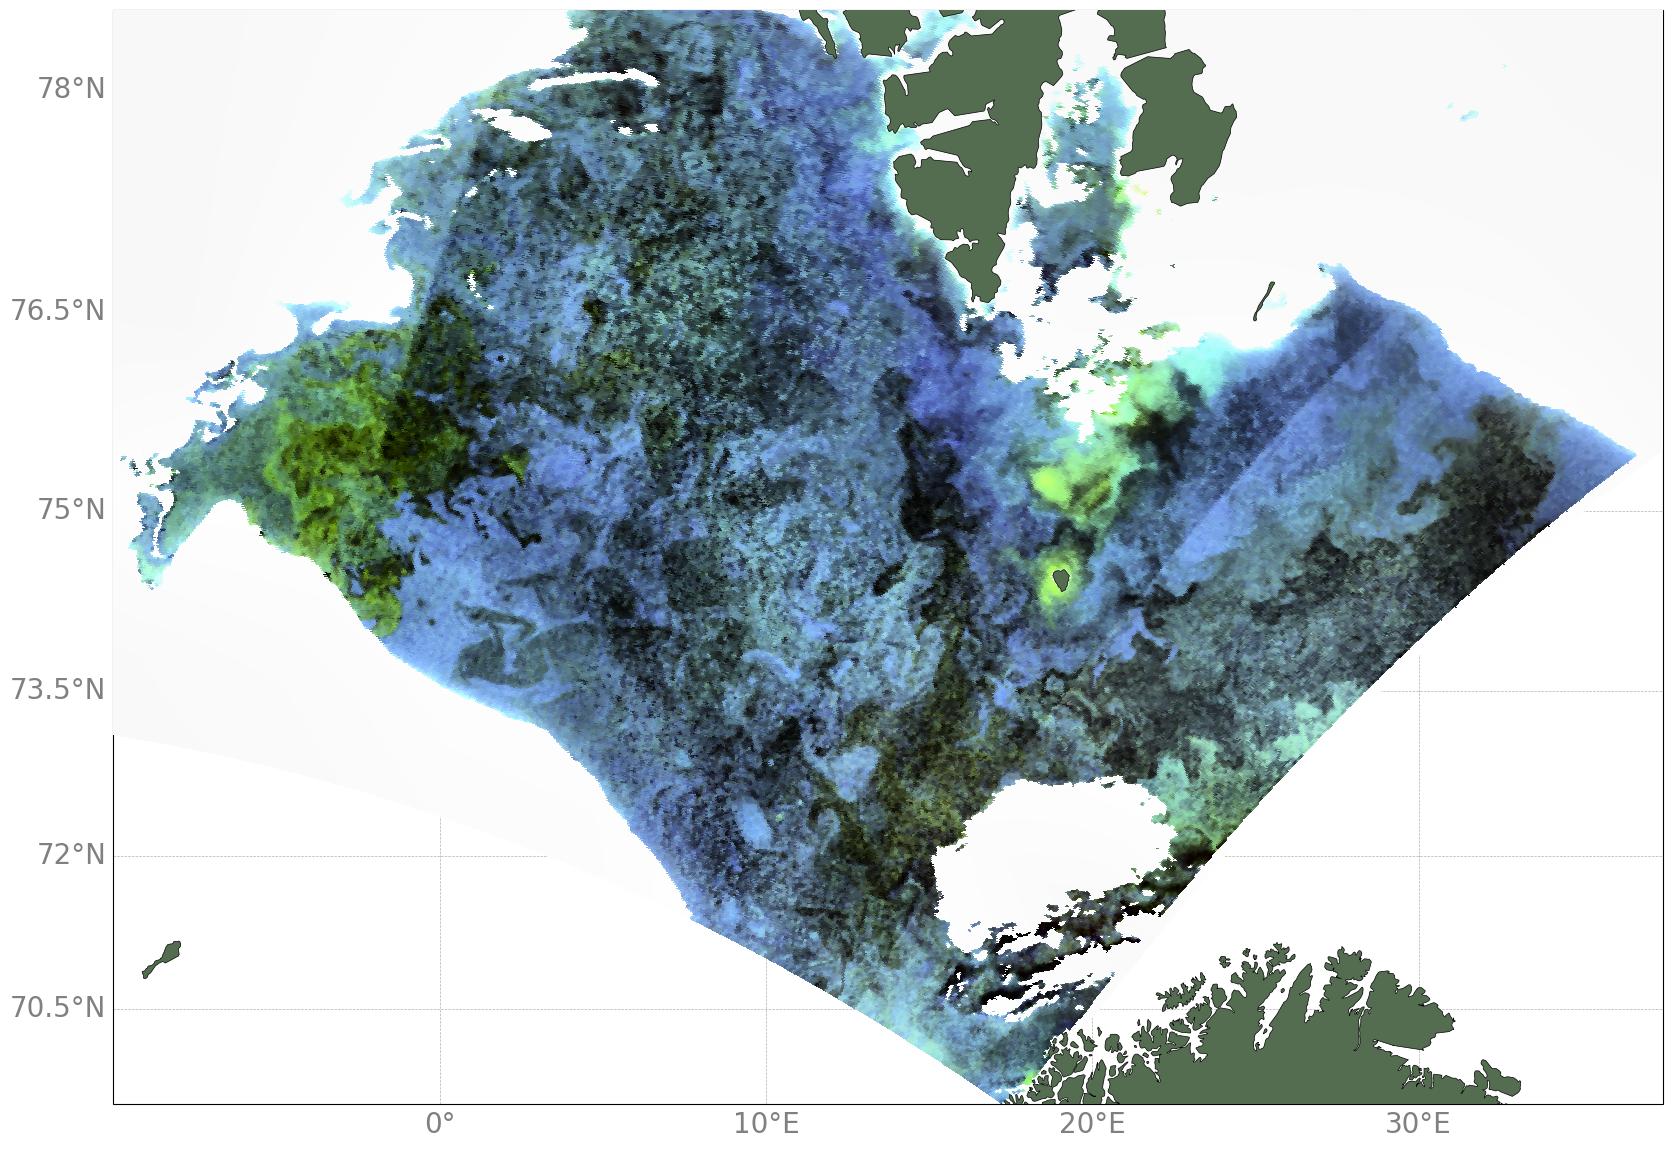

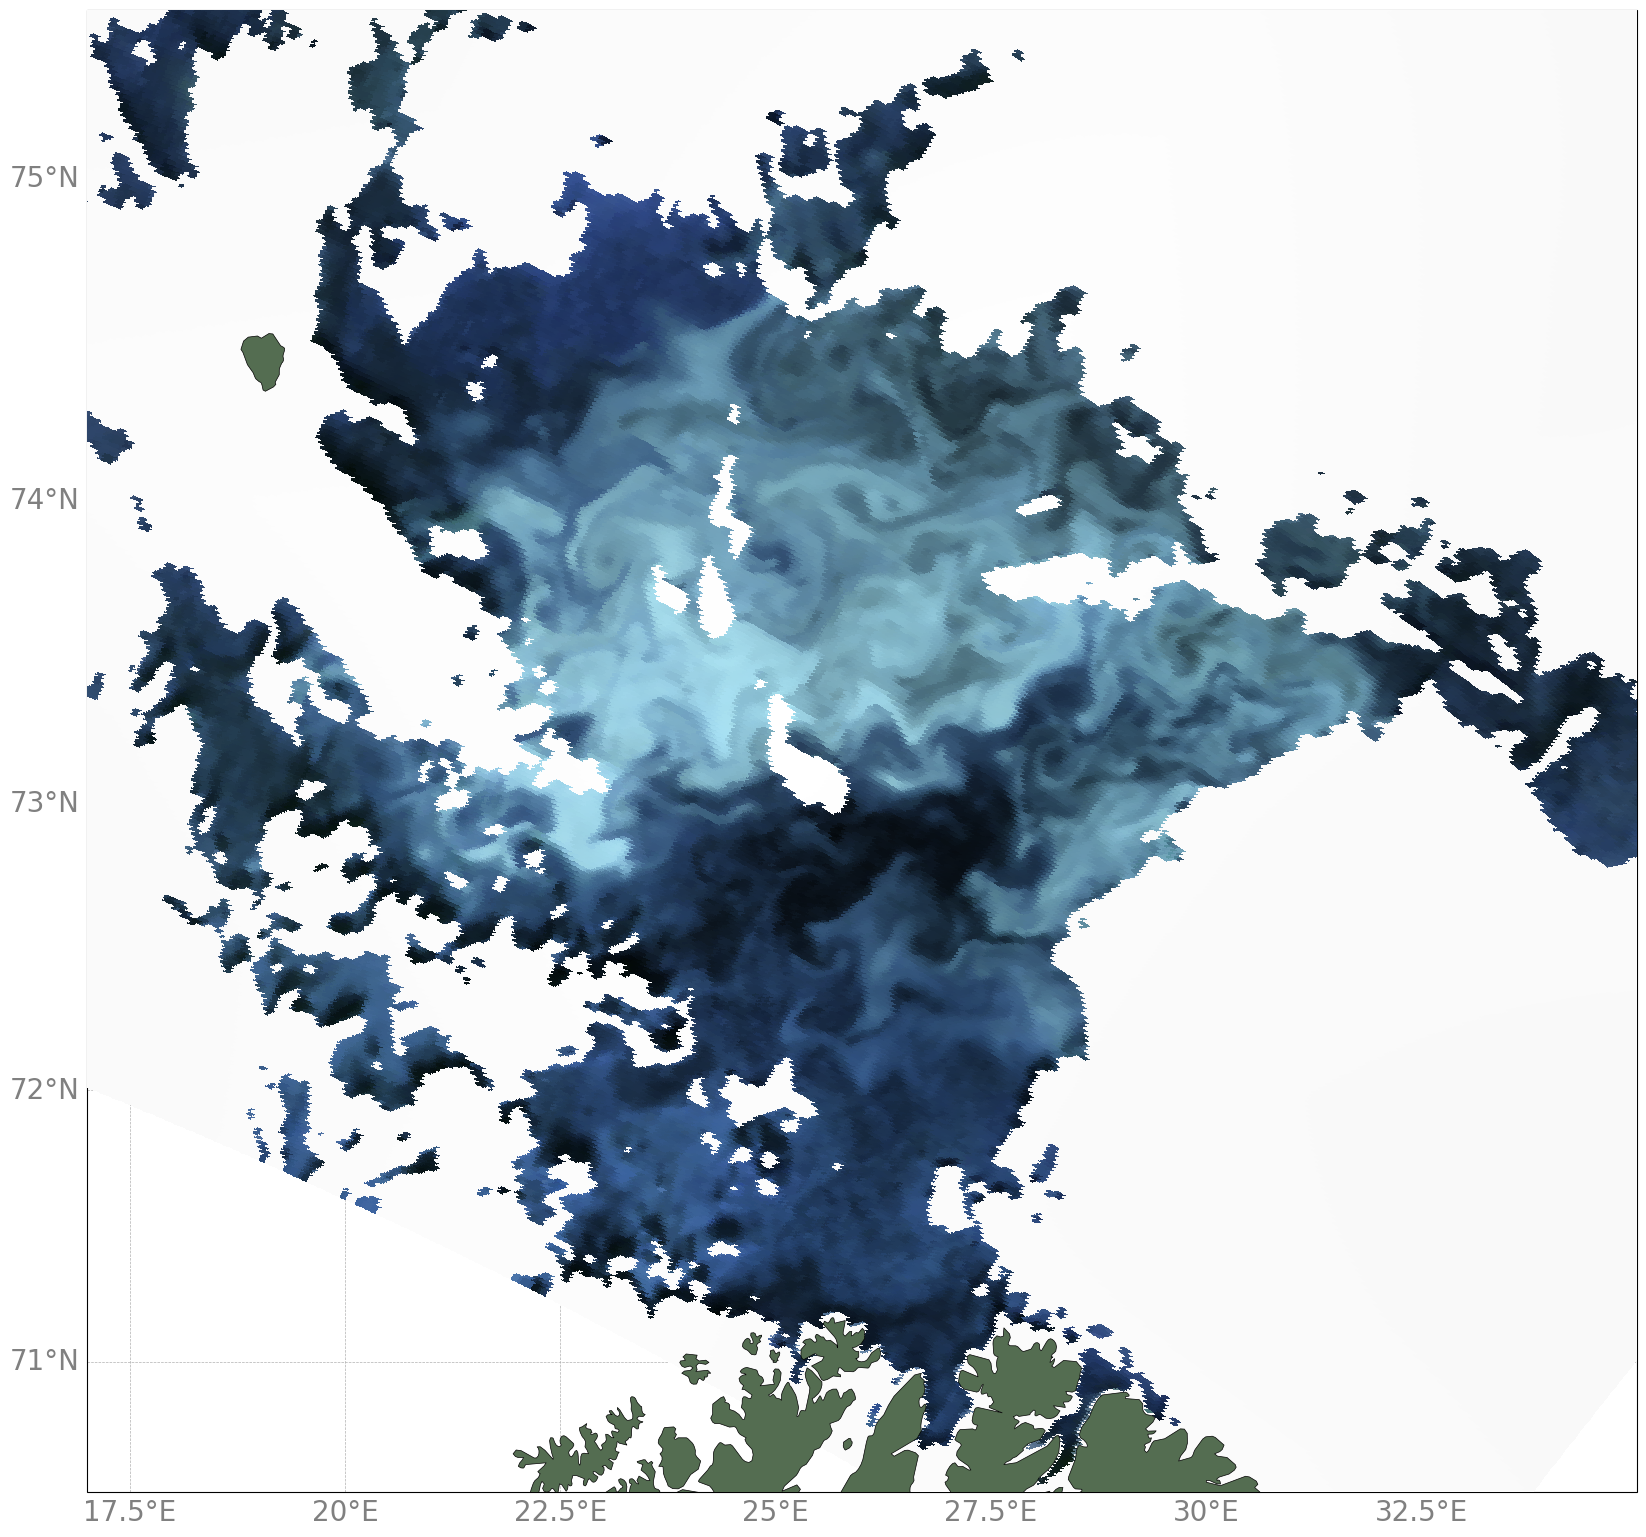

In [17]:
for image, count, filename, linewidth in zip(band_dict, range(len(band_dict)), ["Bloom_RGB", "Cocco_RGB"], [1.5, 2.5]):

    fig, m = plt.subplots(1, 1, figsize=(20, 20), dpi=dpi, subplot_kw={"projection": cartopy.crs.Mercator()})

    # make the colour map
    colorArray = np.array(band_dict[image]["rgb"])
    colorTuple = colorArray.reshape((colorArray.shape[0] * colorArray.shape[1]), 3)
    colorTuple = np.insert(colorTuple, 3, 1.0, axis=1)

    # make the map
    c = m.pcolormesh(band_dict[image]["lon"], band_dict[image]["lat"], band_dict[image]["lon"], 
                     color=colorTuple, transform=cartopy.crs.PlateCarree(), zorder=3, alpha=1.0, linewidth=linewidth)

    # Embellish with gridlines
    m.set_extent(extents[image], crs=cartopy.crs.PlateCarree())
    embellish_plot(m)

    # save and plot
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

If all went as planned, you should now have replicated figure 2 (Cocco_RGB.png) and figure 3 (Bloom_RGB.png) of the **<a href="https://www.eumetsat.int/quantifying-particulate-organic-inorganic-carbon-ocean" target="_blank">Quantifying particulate organic and inorganic carbon in the ocean</a>** case study. These are generated from level-2 reflectances, so the colours are somewhat "enhanced", however you should clearly see the melange of green and brown signals in the first image, and white swirls in the second, indicating differing bloom species and concentrations. We aren't able to identify the algal species in the first image, but in the latter case, we can be quite confident that this is a coccolithophore.

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Deriving and plotting POC
[Back to top](#TOC6TOP)

</div>

Using the equation 1 we defined above, we can calculate POC from OLCI **band 3 (442.5 nm)** and **band 6 (560 nm)**. Note that we are taking the log of the POC only to help with plotting, which will be done against a log colour scale.

In [18]:
band_dict["image0"]["POC"] = np.log10(203.2*(band_dict["image0"]['Oa03_reflectance'].data
                                            / band_dict["image0"]['Oa06_reflectance'].data)**-1.304)

Now we will plot the flagged chlorophyll and POC products for our first scene.

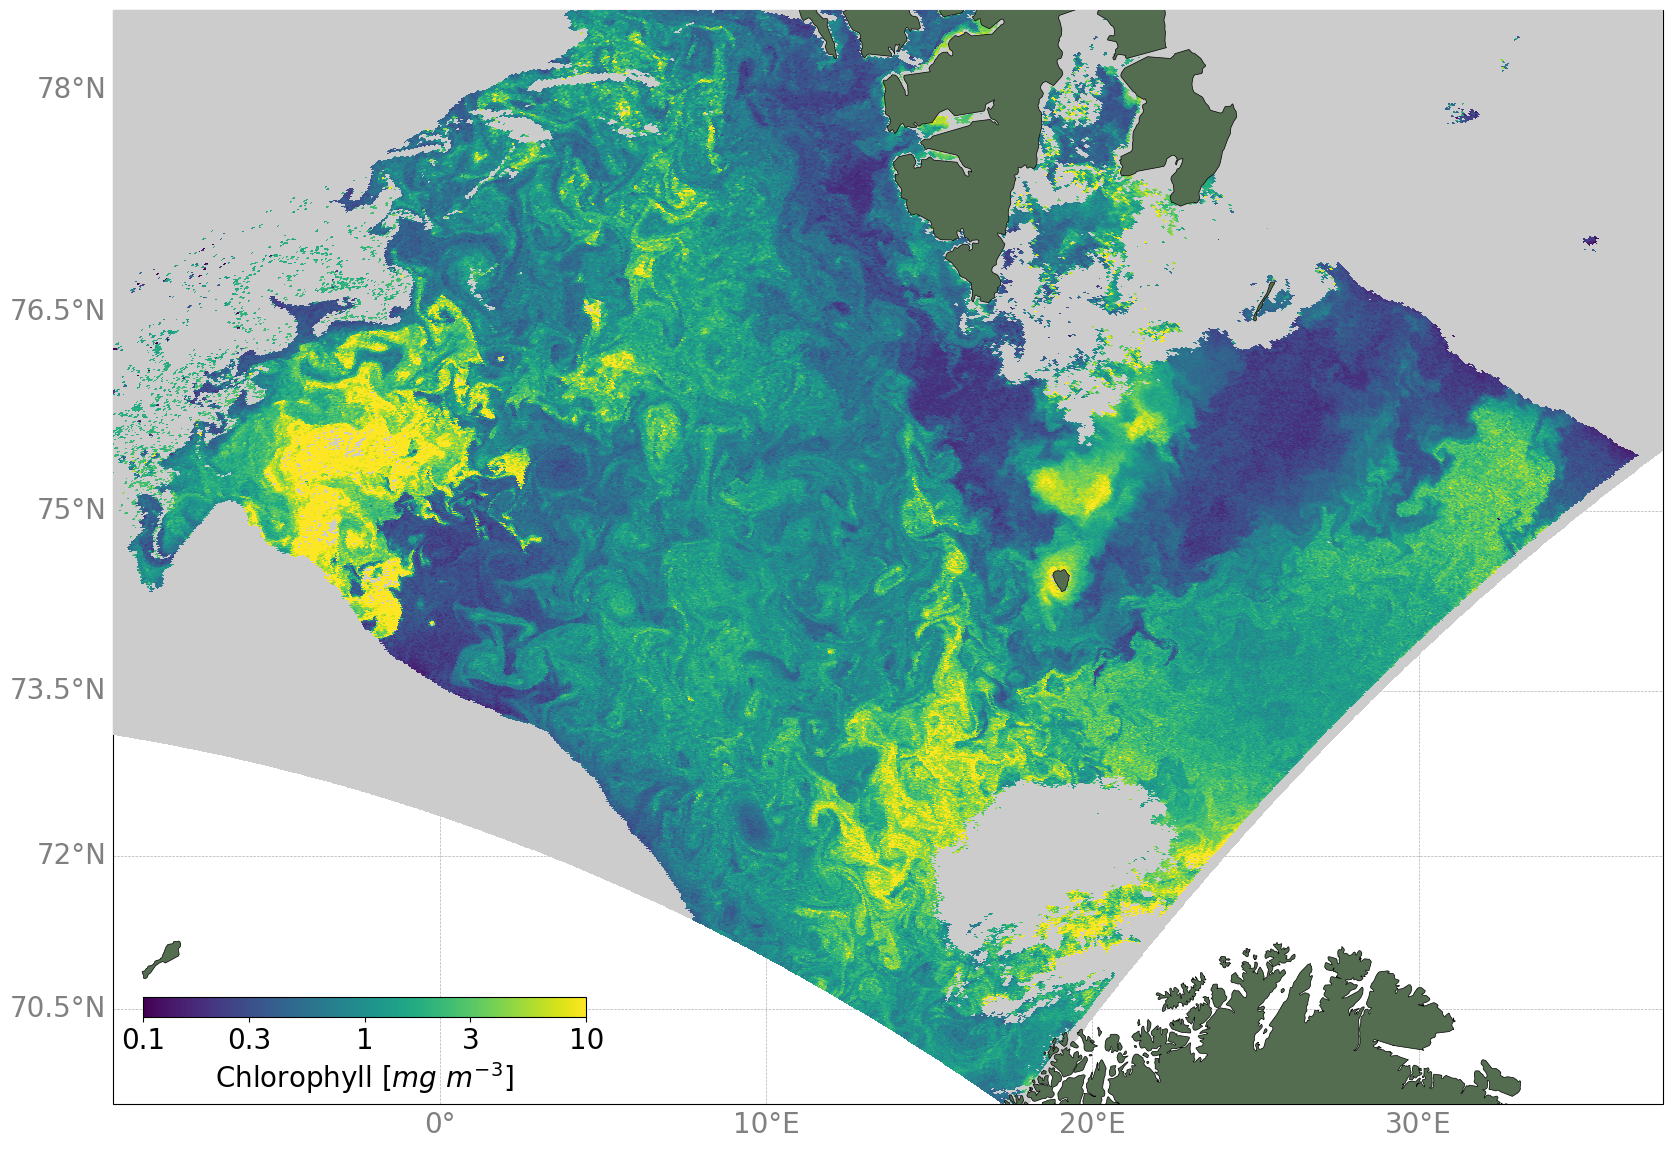

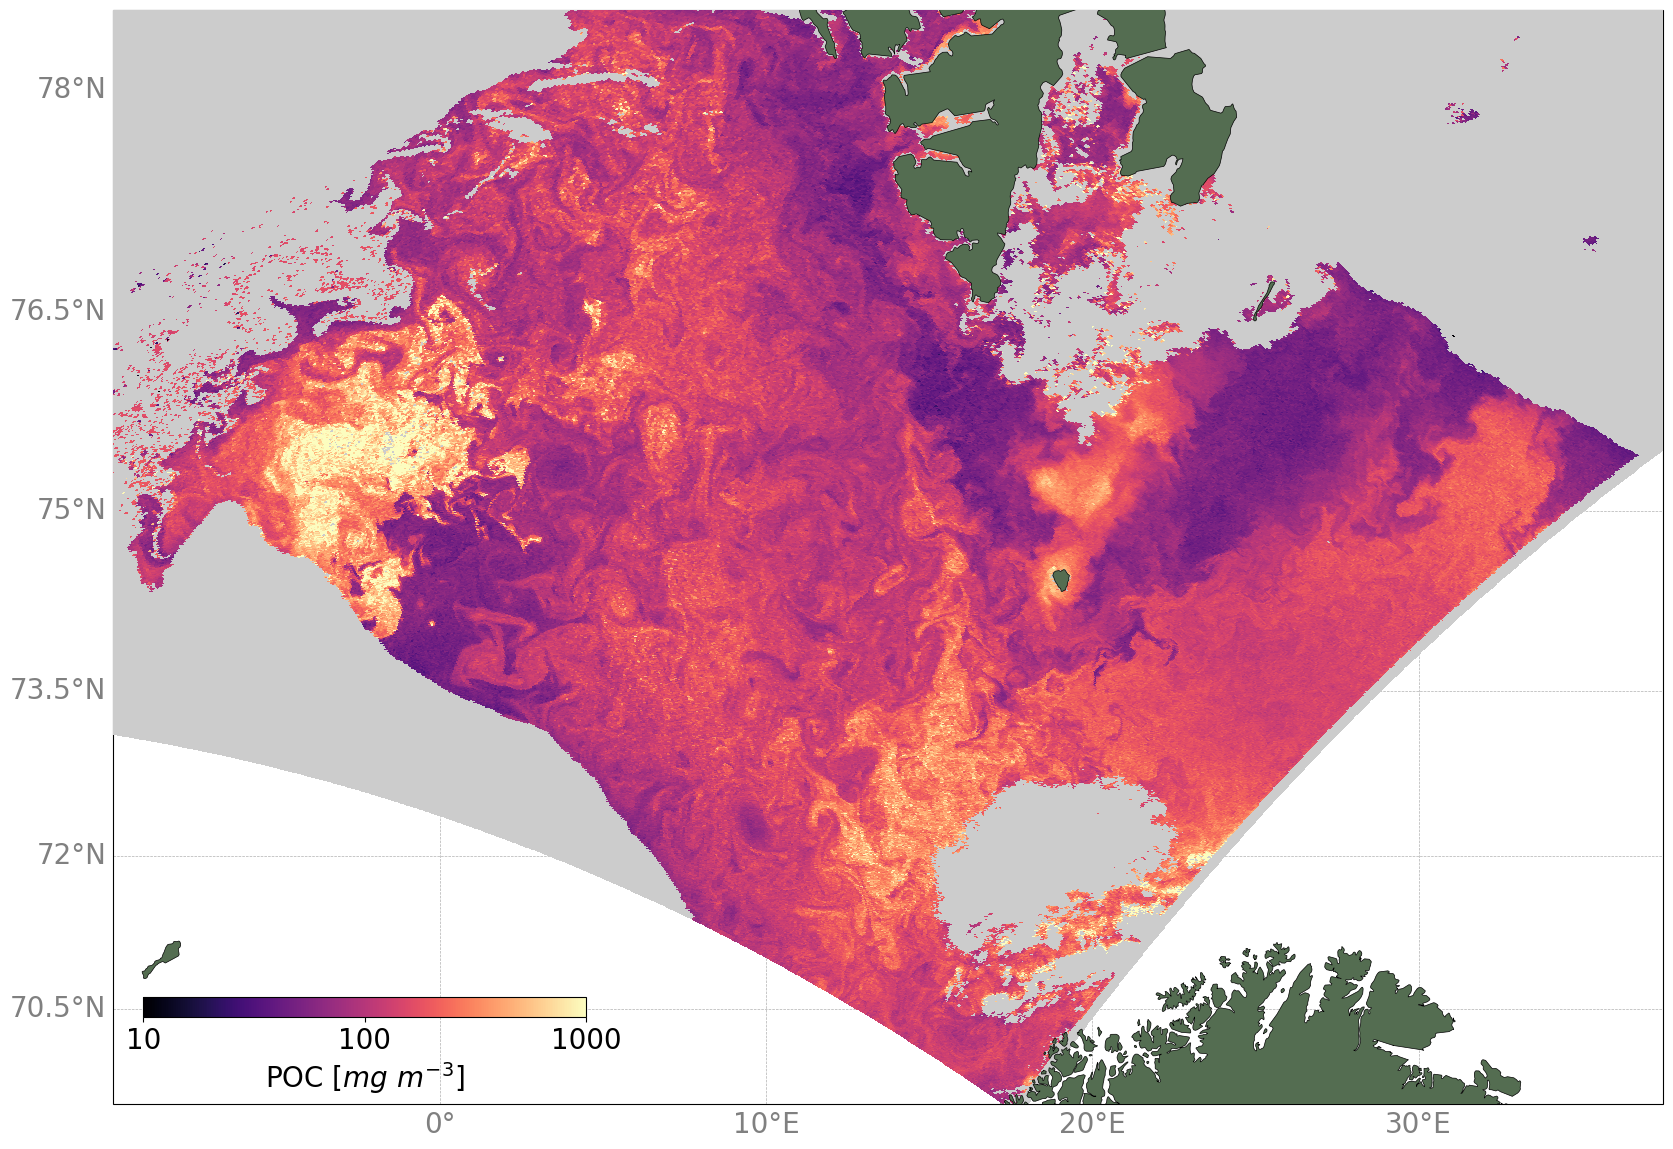

In [19]:
for plot_var, label, ticks, cmap in zip(["CHL", "POC"],
                                  ["Chlorophyll [$mg\ m^{-3}$]", "POC [$mg\ m^{-3}$]"],
                                  [[0.1, 0.3, 1, 3, 10], [10, 100, 1000]], ["viridis", "magma"]):
    
    fig, m = plt.subplots(1, 1, figsize=(20, 20), dpi=dpi, subplot_kw={"projection": cartopy.crs.Mercator()})
    
    cmap = plt.get_cmap(cmap)
    cmap.set_bad(color = '0.8', alpha = 1.0)
    
    # make the map
    c = m.pcolormesh(band_dict["image0"]["lon"], band_dict["image0"]["lat"], band_dict["image0"][plot_var],
                     cmap=cmap, transform=cartopy.crs.PlateCarree(), edgecolor="face", alpha=1.0, zorder=3,
                     vmin=min(np.log10(ticks)), vmax=max(np.log10(ticks)))

    # Embellish with gridlines
    m.set_extent(extents["image0"], crs=cartopy.crs.PlateCarree())
    embellish_plot(m)
    
    # colorbar
    cb_ax = fig.add_axes([m.get_position().x0+0.015, 0.265, m.get_position().width/3.5, 0.01])
    cbar = fig.colorbar(c, cax=cb_ax, orientation="horizontal", label=label)
    cbar.set_ticks(np.log10(ticks))
    cbar.set_ticklabels(ticks)

    # save and plot
    plt.savefig(f"Bloom_{plot_var}.png", bbox_inches='tight')
    plt.show()

The OC4ME algorithm used in the standard processing of OLCI data by EUMETSAT, uses the relative amounts of light reflected in the blue and green wavelengths of visible light, to calculate the chlorophyll-a concentration. This works because large concentrations of phytoplankton have associated high concentrations of the chlorophyll-a pigment, and in waters where phytoplankton concentrations are the dominant source of optical variability, this is closely related to the ratio of blue:green light, as a result of their photosynthetic activity. Biomass concentrations are thus also closely linked to particulate organic carbon (POC) concentrations under these conditions, and as a result, similar algorithms can be used to estimate POC concentration as well. The close correlation between chlorophyll-a concentrations and POC concentrations can be seen when comparing the left and right panels. 

<div class="alert alert-info" role="alert">

## <a id='section7'></a>7. Deriving and plotting PIC (Optional)
[Back to top](#TOCTOP)

</div>

As in the [section 6](#section6), we will now plot the chlorophyll concentration against the SeaDAS derived PIC concentration. First, lets read in the SeaDAS processed PIC product. If you processed the granule we recommended, then the file name should be consistent, but you should make sure to put it in this directory.

In [20]:
# PIC: example file reduced by factor of 5.
SeaDAS_PIC_file = os.path.join(os.getcwd(), "precomputed", "S3B_OLCI_EFR_20220713T100610_L2_OC_reduced.nc")
NAV = xr.open_mfdataset(SeaDAS_PIC_file, group="navigation_data")
PIC = xr.open_mfdataset(SeaDAS_PIC_file, group="geophysical_data")

band_dict[f'image1']["l2gen_lon"] = NAV["longitude"]
band_dict[f'image1']["l2gen_lat"] = NAV["latitude"]
band_dict[f'image1']["l2gen_PIC"] = np.log10(PIC["pic"]*12*1000)

NAV.close()
PIC.close()

Now we will plot the flagged chlorophyll and PIC products for our second scene.

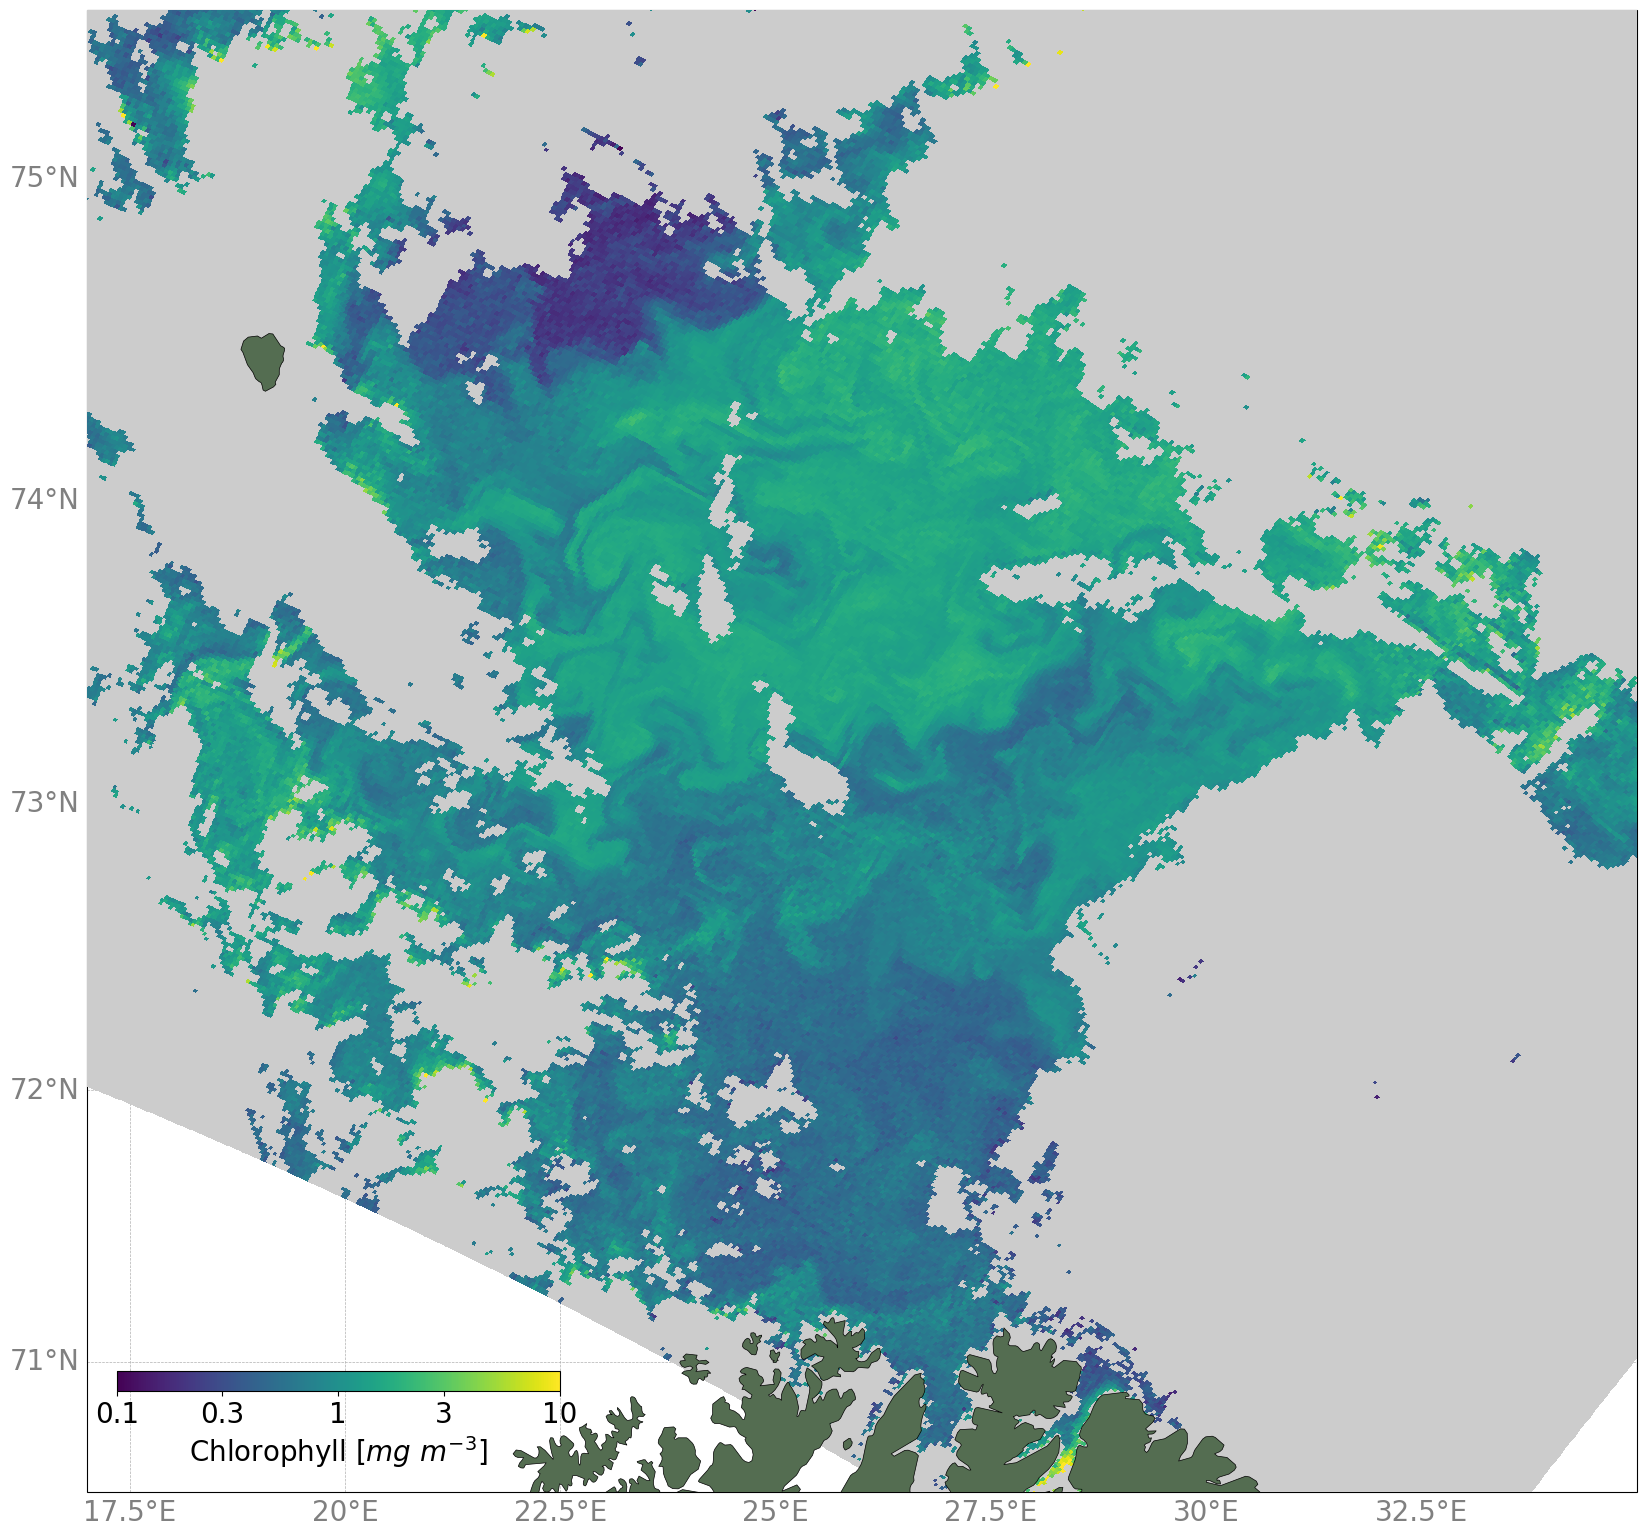

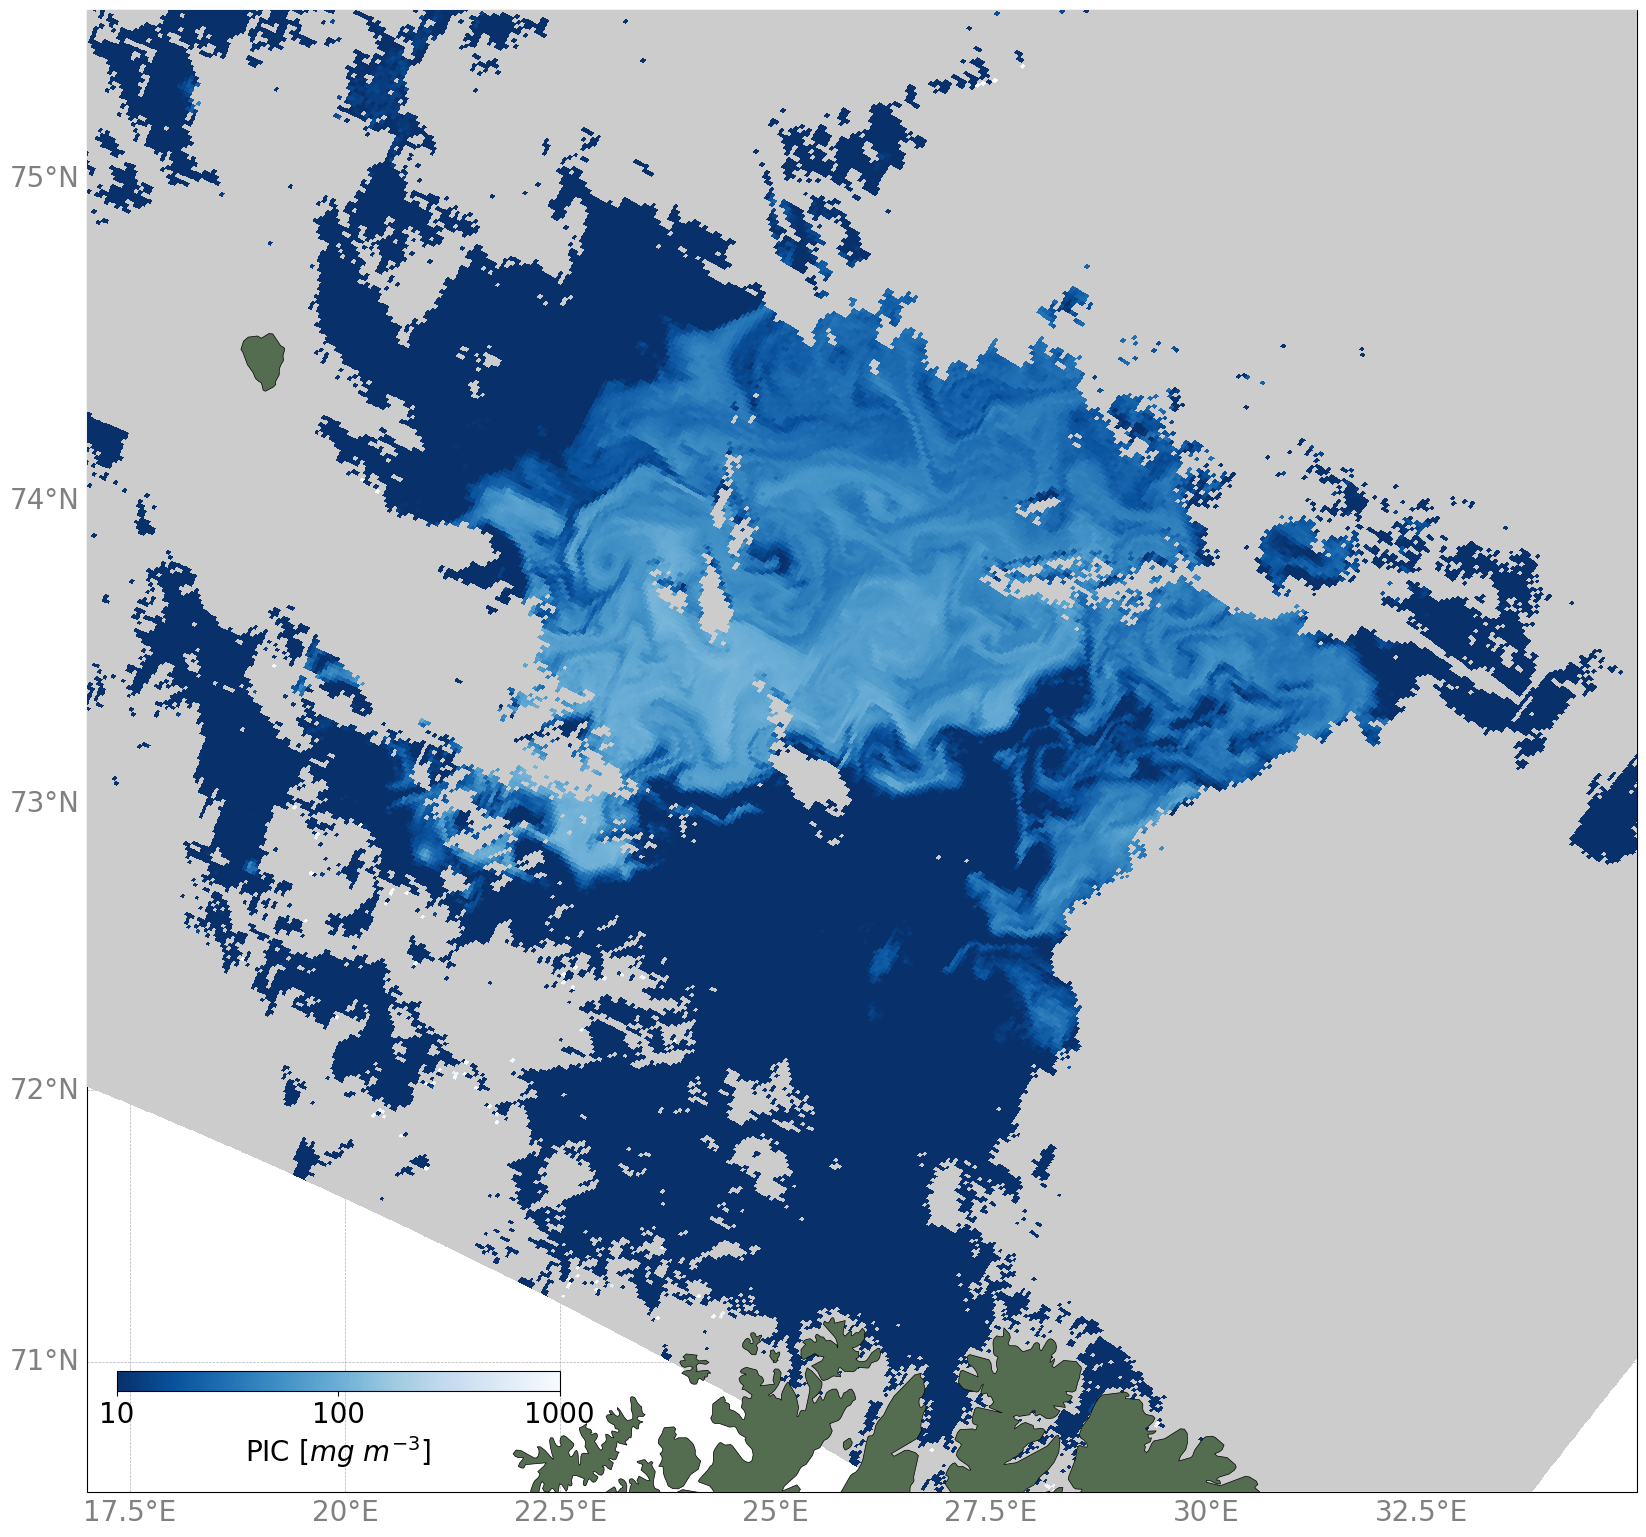

In [21]:
for plot_var, label, ticks, cmap in zip(["CHL", "l2gen_PIC"],
                                        ["Chlorophyll [$mg\ m^{-3}$]", "PIC [$mg\ m^{-3}$]"],
                                        [[0.1, 0.3, 1, 3, 10], [10, 100, 1000]], ["viridis", "Blues_r"]):

    fig, m = plt.subplots(1, 1, figsize=(20, 20), dpi=dpi, subplot_kw={"projection": cartopy.crs.Mercator()})

    cmap = plt.get_cmap(cmap)
    cmap.set_bad(color = '0.8', alpha = 1.0)
    if plot_var == "l2gen_PIC":
        lon_var = "l2gen_lon" ; lat_var = "l2gen_lat"
    else:
        lon_var = "lon" ; lat_var = "lat"

    # make the map
    c = m.pcolormesh(band_dict["image1"][lon_var], band_dict["image1"][lat_var], band_dict["image1"][plot_var],
                     cmap=cmap, transform=cartopy.crs.PlateCarree(), edgecolor="face", alpha=1.0, zorder=3,
                     vmin=min(np.log10(ticks)), vmax=max(np.log10(ticks)))

    # add some map embellishments
    m.set_extent(extents["image1"], crs=cartopy.crs.PlateCarree())
    embellish_plot(m)
    
    # colorbar
    cb_ax = fig.add_axes([m.get_position().x0+0.015, 0.175, m.get_position().width/3.5, 0.01])
    cbar = fig.colorbar(c, cax=cb_ax, orientation="horizontal", label=label)
    cbar.set_ticks(np.log10(ticks))
    cbar.set_ticklabels(ticks)

    # save and plot
    plt.savefig(f"Cocco_{plot_var}.png", bbox_inches='tight')
    plt.show()

Whilst the patterns seen in the true colour RGB (second figure in this notebook, case study Figure 2), are represented in the image of the corresponding chlorophyll-a product (top panel in the cell above), it is likely that the chlorophyll-a estimates are inaccurate as these algorithms were not derived using measurements in coccolithophore blooms, which present as significantly different to other phytoplankton blooms both in magnitude and shape of the reflectance. These are the facets of the optical signal associated with coccolithophores can be exploited with the specific algorithms used to produce (bottom panel in the cell above). Close relationships can be seen between the bright waters identified in the true colour RGB and the high PIC concentration estimated in the final figure.

<hr>
<a href="../../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>